In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
def Get_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'gzip',
        'Connection': 'close'
    }
    # 请求得到网页内容
    req = requests.get(url,headers=headers)
    # 格式化网页
    soup=BeautifulSoup(req.text,"lxml")
    # 使用soup对象findl所需内容
    tables = soup.find(name='table')
    # 提取需要的数据
    data=pd.read_html(str(tables),encoding='utf-8')[0]

    return data

In [5]:
def data_process(data):

    data=data.copy()

    # print(data)
    # 更改列名
    data.columns=data.iloc[0,:].values
    # 删除第一行记录
    data = data.drop(axis=0,index=0).reset_index(drop=True)

    # 将温度列分列成最高和最低温度
    data = data.applymap(lambda x:x.strip())
    # data = data.applymap(lambda x:x.replace(' ',''))
    data["最低气温/最高气温"] = data["最低气温/最高气温"].apply(lambda x:x.replace(' ',''))
    df = data["最低气温/最高气温"].str.split('/', expand=True)
    # print(df)
    data['最高温度'] = df[1]
    data['最低温度'] = df[0]
    data['最高温度'] = data['最高温度'].apply(lambda x: float(x[:-1]))
    data['最低温度'] = data['最低温度'].apply(lambda x: float(x[:-1]))
    data['日期'] = data['日期'].apply(lambda x: x.replace('年', '-').replace('月', '-').replace('日', ''))
    # 特征拆分
    df = data["风力风向(夜间/白天)"].str.split('/', expand=True)
    data['夜间风力风向'] =df[0]
    data['白天风力风向'] =df[1]
    # 特征拆分
    df=data["天气状况"].str.split('/', expand=True)
    data['夜间天气'] =df[0]
    data['白天天气'] =df[1]
    data["夜间天气"] = data["夜间天气"].apply(lambda x:x.replace(' ',''))
    data["白天天气"] = data["白天天气"].apply(lambda x:x.replace(' ',''))
    # 特征拆分
    df=data["夜间风力风向"].str.split(' ', expand=True)
    data["夜间风向"]=df[0]
    data["夜间风力"]=df[1]
    # 特征拆分
    df=data["白天风力风向"].str.split(' ', expand=True)
    data["白天风向"]=df[0]
    data["白天风力"]=df[1]
    data['年'] = data['日期'].apply(lambda x:x[:4])
    # 返回想要的数据
    return data[['年','日期','最低温度','最高温度','夜间风力','夜间风向','白天风力','白天风向','夜间天气','白天天气']]

In [6]:
result=[]

# for i in range(2020, 2024):
for i in range(2023, 2024):
    create_url = 'http://www.tianqihoubao.com/lishi/shanghai/month/{}05.html'.format(str(i))
    print('正在打开网页：',create_url)
    # 获取数据
    data = Get_data(create_url)
    print(data)
    # 数据处理
    data = data_process(data)
    result.append(data)
    print(data)

data_all = pd.concat(result,axis=0)
print(data_all)
# 输出到本地
data_all.to_csv('result.csv',index='False',encoding='gbk')

正在打开网页： http://www.tianqihoubao.com/lishi/shanghai/month/202305.html
              0        1            2                    3
0            日期     天气状况    最低气温/最高气温          风力风向(夜间/白天)
1   2023年05月01日   晴  /多云  17℃  /  29℃  东南风 1-2级  /东南风 1-2级
2   2023年05月02日   晴  /小雨  18℃  /  25℃  东南风 1-2级  /东南风 1-2级
3   2023年05月03日  小雨  /小雨  21℃  /  27℃   南风 1-2级  /东南风 1-2级
4   2023年05月04日  小雨  /中雨  21℃  /  30℃    南风 3-4级  /南风 3-4级
5   2023年05月05日   中雨  /阴  17℃  /  25℃   西南风 3-4级  /西风 3-4级
6   2023年05月06日  小雨  /小雨  15℃  /  23℃    北风 1-2级  /北风 1-2级
7   2023年05月07日   小雨  /阴  15℃  /  17℃   西北风 3-4级  /北风 3-4级
8   2023年05月08日   多云  /晴  13℃  /  19℃   东北风 3-4级  /北风 1-2级
9   2023年05月09日    晴  /阴  14℃  /  23℃   东风 3-4级  /东南风 1-2级
10  2023年05月10日   多云  /阴  15℃  /  23℃    东风 1-2级  /东风 1-2级
11  2023年05月11日    阴  /阴  16℃  /  21℃   东风 1-2级  /东南风 1-2级
12  2023年05月12日   阴  /多云  17℃  /  24℃  东南风 1-2级  /东南风 1-2级
13  2023年05月13日   多云  /阴  19℃  /  29℃   西风 3-4级  /西南风 1-2级
14  2023年05月14日    晴  /晴  21℃  /  32℃  西北风 1-2

In [20]:
def draw(data,year):

    #开始画图
    data= data.copy()
    data = data[data['年']==str(year)]
    data['日期'] = pd.to_datetime(data['日期'])
    # print(data.dtypes)
    # 把日期设置成索引
    # data = data.set_index('日期')
    # print(data.head())
    #绘制城市最低温度和最高温度走势图
    plt.figure(figsize=(10, 5))
    plt.ylabel('摄氏度',fontsize =20)
    plt.xlabel('日期',fontsize =20)
    plt.title('上海市历史温度',fontsize =20)
    plt.plot(data['日期'],data['最高温度'], label='最高温度',c='r')
    plt.plot(data['日期'],data['最低温度'], label='最低温度',c='b')
    plt.legend(loc='best')
    plt.show()
    #绘制白天天气的个数柱状图
    data_count = data.groupby('白天天气')['白天天气'].count()
    print(data_count)
    plt.bar(data_count.index,data_count.values)
    plt.ylabel('天数',fontsize =20)
    plt.xlabel('白天天气',fontsize =20)
    plt.show()

    #绘制白天风向的个数柱状图
    data_count = data.groupby('白天风向')['白天风向'].count()
    print(data_count)
    plt.bar(data_count.index,data_count.values)
    plt.ylabel('天数',fontsize =20)
    plt.xlabel('白天风向',fontsize =20)
    plt.show()
    #绘制白天风力的个数柱状图
    data_count = data.groupby('白天风力')['白天风力'].count()
    print(data_count)
    plt.bar(data_count.index,data_count.values)
    plt.ylabel('天数',fontsize =20)
    plt.xlabel('白天风力',fontsize =20)
    plt.show()

In [11]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

正在打开网页： http://www.tianqihoubao.com/lishi/shanghai/month/202305.html
              0        1            2                    3
0            日期     天气状况    最低气温/最高气温          风力风向(夜间/白天)
1   2023年05月01日   晴  /多云  17℃  /  29℃  东南风 1-2级  /东南风 1-2级
2   2023年05月02日   晴  /小雨  18℃  /  25℃  东南风 1-2级  /东南风 1-2级
3   2023年05月03日  小雨  /小雨  21℃  /  27℃   南风 1-2级  /东南风 1-2级
4   2023年05月04日  小雨  /中雨  21℃  /  30℃    南风 3-4级  /南风 3-4级
5   2023年05月05日   中雨  /阴  17℃  /  25℃   西南风 3-4级  /西风 3-4级
6   2023年05月06日  小雨  /小雨  15℃  /  23℃    北风 1-2级  /北风 1-2级
7   2023年05月07日   小雨  /阴  15℃  /  17℃   西北风 3-4级  /北风 3-4级
8   2023年05月08日   多云  /晴  13℃  /  19℃   东北风 3-4级  /北风 1-2级
9   2023年05月09日    晴  /阴  14℃  /  23℃   东风 3-4级  /东南风 1-2级
10  2023年05月10日   多云  /阴  15℃  /  23℃    东风 1-2级  /东风 1-2级
11  2023年05月11日    阴  /阴  16℃  /  21℃   东风 1-2级  /东南风 1-2级
12  2023年05月12日   阴  /多云  17℃  /  24℃  东南风 1-2级  /东南风 1-2级
13  2023年05月13日   多云  /阴  19℃  /  29℃   西风 3-4级  /西南风 1-2级
14  2023年05月14日    晴  /晴  21℃  /  32℃  西北风 1-2

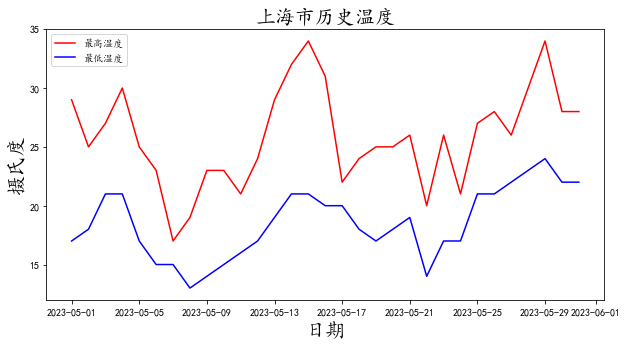

白天天气
中雨     1
多云     5
小雨     9
晴      4
阴     12
Name: 白天天气, dtype: int64


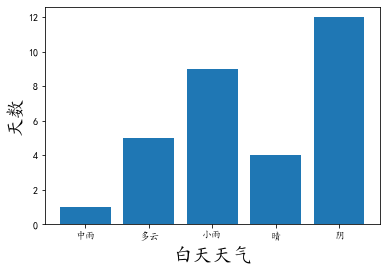

白天风向
东北风     2
东南风    15
东风      2
北风      6
南风      3
西南风     2
西风      1
Name: 白天风向, dtype: int64


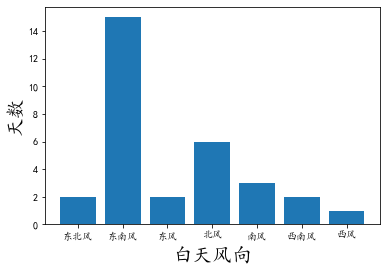

白天风力
1-2级    18
3-4级    13
Name: 白天风力, dtype: int64


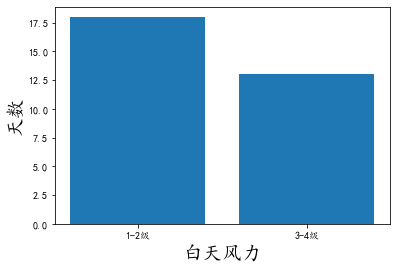

In [21]:
result=[]

# for i in range(2020, 2024):
for i in range(2023, 2024):
    create_url = 'http://www.tianqihoubao.com/lishi/shanghai/month/{}05.html'.format(str(i))
    print('正在打开网页：',create_url)
    # 获取数据
    data = Get_data(create_url)
    print(data)
    # 数据处理
    data = data_process(data)
    result.append(data)
    print(data)

data_all = pd.concat(result,axis=0)
print(data_all)
# 输出到本地
data_all.to_csv('result.csv',index='False',encoding='gbk')
draw(data_all, 2023)